Dimensionality reduction for microarray analysis
================================================

Microarrays enable to obtain enormous amount of data describing simultaneous activity of thousands of genes. These data are 
used to analyze group of genes, dependecies among genes, to study gene expression with respect to age or health condition
of the studied organism. The raw data rwequire preprocessing. Micorarrays are designed for specific organisms or specific
tests. The design of a microarray is referred as platform. See [Affymetrix Rat Expression 230A Array](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL341) for an example microarray for Rattus norvegicus.
Therefore in comparing data from different experiments, a care must be taken to compare expression of the same
genes. The GEO database [Gene Expression Omnibus](http://www.ncbi.nlm.nih.gov/geo/) contains (among others) dastasets from 
microarray experiments.
In comparative studies several experiments are performed using the same or related microarrays and sometimes the results are collected in a table format. Let us inspect a sample [Expression data for whole adult tissue; Drosophila males of seven species](http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse7873). This experiment contains 48 samples (from GSM190916 to GSM190963) from 48 microarray experiments. Instead of downloading the sequences of values (samples) one by one, we can download a matrix "Series Matrix File(s)" [ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE7nnn/GSE7873/matrix/](ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE7nnn/GSE7873/matrix/).

This notebook uses downloaded and unzipped file [GSE7873_series_matrix.txt](GSE7873_series_matrix.txt). The file contains TAB delimited table preceded by description and followed by single line of description. Each line of the description starts by the exclamation mark (!).

In [11]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Just for testing we will use a smaler data file [GSE7873_series_matrix_test.txt](GSE7873_series_matrix_test.txt)

In [23]:
data = np.genfromtxt("GSE7873_series_matrix_test.txt",delimiter='\t',comments='!',dtype="S15"+48*",f8",skip_header=1)

In [14]:
df = pd.read_csv('GSE7873_series_matrix.txt', sep='\t',comment='!',header=1)
df.shape

(14009, 49)

In [13]:
def scatter(X):
    plt.scatter(X[:, 0], X[:, 1])

In [15]:
ind = df.columns[1:]
data = df[1:4]
a = np.array(df[ind])
X = a[:1000, :]
X.shape

(1000, 48)

In [17]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [31]:
tsne = TSNE(perplexity=50)
X_embedding = tsne.fit_transform(X)

In [28]:
pca = PCA()
pca_embedding = pca.fit_transform(X)

In [37]:
from MulticoreTSNE import MulticoreTSNE as FastTSNE
from tqdm import tqdm

In [ ]:
# scatter(pca_embedding)
scatter(X_embedding)

In [38]:
embeds = []
for p in tqdm([2, 5, 10, 30, 50, 100]):
    ftsne = FastTSNE(perplexity=p, n_jobs=4)
    embeds.append(ftsne.fit_transform(X))

100%|██████████| 6/6 [00:44<00:00,  7.45s/it]


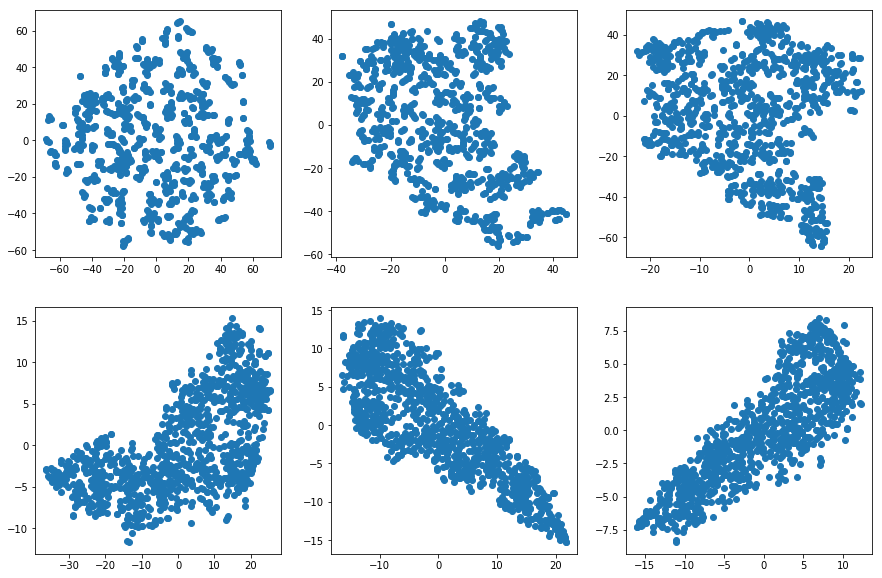

In [42]:
plt.figure(figsize=(15, 10))
plt.subplot(231); scatter(embeds[0])
plt.subplot(232); scatter(embeds[1])
plt.subplot(233); scatter(embeds[2])
plt.subplot(234); scatter(embeds[3])
plt.subplot(235); scatter(embeds[4])
plt.subplot(236); scatter(embeds[5])

In [43]:
embeds_2500 = []
for p in tqdm([2, 5, 10, 30, 50, 100]):
    ftsne = FastTSNE(perplexity=p, n_jobs=4, n_iter=2500)
    embeds_2500.append(ftsne.fit_transform(X))

100%|██████████| 6/6 [02:08<00:00, 21.43s/it]


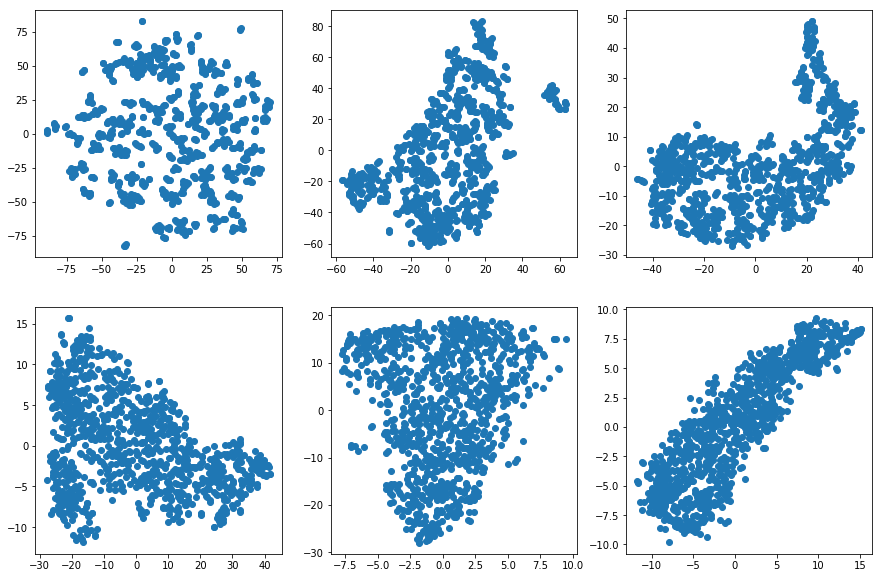

In [44]:
plt.figure(figsize=(15, 10))
plt.subplot(231); scatter(embeds_2500[0])
plt.subplot(232); scatter(embeds_2500[1])
plt.subplot(233); scatter(embeds_2500[2])
plt.subplot(234); scatter(embeds_2500[3])
plt.subplot(235); scatter(embeds_2500[4])
plt.subplot(236); scatter(embeds_2500[5])

In [45]:
from sklearn.manifold import Isomap

In [49]:
iso_embeddings = []

for i in [2, 5, 10, 15]:
    isomap = Isomap(n_neighbors=i)
    iso_embeddings.append(isomap.fit_transform(X))

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(221); scatter(iso_embeddings[0])
plt.subplot(222); scatter(iso_embeddings[1])
plt.subplot(223); scatter(iso_embeddings[2])
plt.subplot(224); scatter(iso_embeddings[3])

In [51]:
from sklearn.manifold import LocallyLinearEmbedding

In [56]:
lle_embeddings = []

for i in [2, 5, 10, 15]:
    lle_embeddings.append(LocallyLinearEmbedding(n_neighbors=i).fit_transform(X))

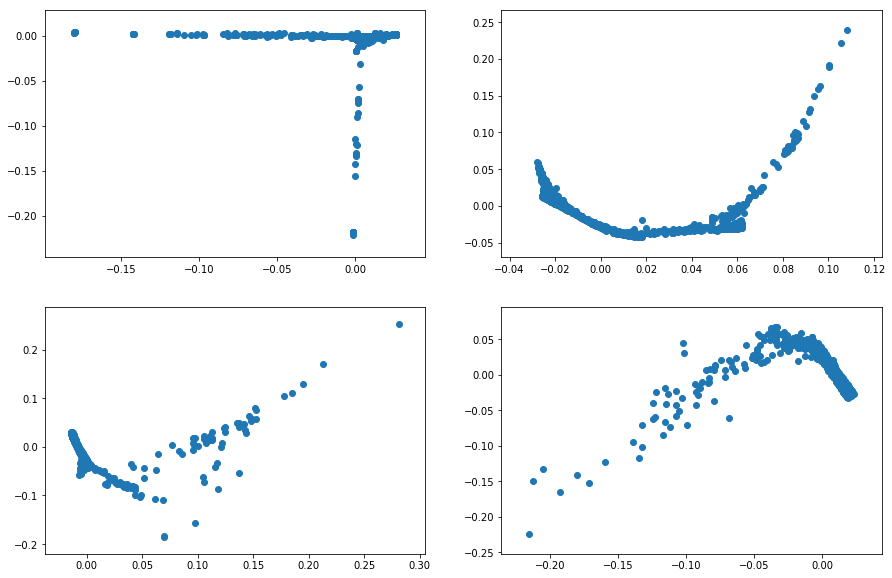

In [57]:
plt.figure(figsize=(15, 10))
plt.subplot(221); scatter(lle_embeddings[0])
plt.subplot(222); scatter(lle_embeddings[1])
plt.subplot(223); scatter(lle_embeddings[2])
plt.subplot(224); scatter(lle_embeddings[3])

In this notebook, we use principal components analysis (PCA) to analyze the microarray data. The main goal is to try to identify groups of vectors corresponding to different species.

In [34]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(a)
pca.explained_variance_ratio_

array([9.73306619e-01, 2.16412808e-02, 2.29539152e-03, 1.17398677e-03,
       6.65204630e-04, 3.14180663e-04, 1.72463781e-04, 1.56983582e-04,
       8.38425070e-05, 7.06019545e-05, 3.87072219e-05, 3.59548245e-05,
       2.79632283e-05, 1.68199626e-05, 3.94877982e-33])

In [16]:
sum(pca.explained_variance_)

229420505.9969762

In [17]:
import pandas as pd
import numpy as np
from statsmodels.sandbox.tools.tools_pca import pcasvd

First we read the data file.

In [ ]:
url = "sp.dyn.tfrt.in_Indicator_en_csv_v2.csv"
data = pd.read_csv(url, skiprows=2)
data.head()

Some entries in the data file are not countries, they are regions consisting of multiple countries.  We will remove those entries before proceeding.  We identified a set of substrings that identify the records that we want to remove.  We print out the names we are removing to make sure we don't remove anything incorrectly. 

In [3]:
for tok in ["IFC", "developing", "income", "European", "HIPC", "classified", 
    "Least", "Other", "small states", "cone", "world", "baltics"]:
    ii = [i for i in data.index if tok.lower() in data.loc[i, "Country Name"].lower()]
    print "\n".join(data.loc[ii, "Country Name"])
    data = data.drop(ii)

Sub-Saharan Africa (IFC classification)
East Asia and the Pacific (IFC classification)
Europe and Central Asia (IFC classification)
Latin America and the Caribbean (IFC classification)
Middle East and North Africa (IFC classification)
South Asia (IFC classification)
East Asia & Pacific (developing only)
Europe & Central Asia (developing only)
Latin America & Caribbean (developing only)
Middle East & North Africa (developing only)
Sub-Saharan Africa (developing only)
East Asia & Pacific (all income levels)
Europe & Central Asia (all income levels)
High income
Latin America & Caribbean (all income levels)
Low income
Lower middle income
Low & middle income
Middle East & North Africa (all income levels)
Middle income
High income: nonOECD
High income: OECD
Sub-Saharan Africa (all income levels)
Upper middle income
European Union
Heavily indebted poor countries (HIPC)
Not classified
Least developed countries: UN classification
Other small states
Caribbean small states
Pacific island small st

Next we create a numeric data matrix containing the fertility rates, and a separate list of strings containing the country names.

In [4]:
years = range(1960, 2012)
years_str = ["%.0f" % y for y in years]
mat = data.loc[:, ["Country Name",] + years_str].dropna()
countries = mat["Country Name"].tolist()
mat = np.asarray(mat.loc[:, years_str])

There are two ways to use PCA to analyze a rectangular matrix: we can treat the rows as the "objects" and the columns as the "variables", or vice-versa.  Here we will treat the fertility measures as "variables" used to measure the countries as "objects".  Thus the goal will be to reduce the yearly fertility rate values to a small number of fertility rate "profiles" or "basis functions" that capture most of the variation over time in the different countries.

The mean trend is removed in PCA, but it is worthwhile taking a look at it.  It shows that fertility has dropped steadily over the time period covered in this dataset.  Note that the mean is calculated using a country as the unit of analysis, ignoring population size.  This is also true for the PC analysis conducted below.  A more sophisticated analysis might weight the countries, say by population in 1980.

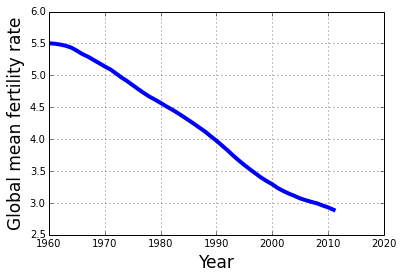

In [5]:
plt.clf()
mn = mat.mean(0)
plt.plot(years, mn, '-', lw=4)
plt.grid(True)
plt.xlabel("Year", size=17)
plt.ylabel("Global mean fertility rate", size=17)

Next we perform the PCA:

In [6]:
xreduced, scores, evals, evecs = pcasvd(mat)

Based on the eigenvalues, we see that the first PC dominates, with perhaps a small amount of meaningful variation captured in the second and third PC's.

In [ ]:
plt.clf()
plt.plot(evals[0:10], lw=4)
plt.grid(True)
plt.xlabel("Component number", size=17)
plt.ylabel("Eigenvalue", size=17)

Next we will plot the PC factors.  The dominant factor is essentially flat, and negative.  Countries with a positive score on the first factor will have lower overall fertility compared to the mean, countries with a negative score on the first factor will have higher overall fertility compared to the mean.  The second factor is increasing over time.  Countries with a positive score on the second factor will increase faster (or decrease slower) compared to the mean shown above.  Countries with a negative score on the second factor will decrease faster than the mean.  

In [ ]:
plt.figure(figsize=(8,4))
plt.clf()
plt.axes([0.1, 0.1, 0.75, 0.9])
plt.plot(years, evecs[:, 0], lw=4, alpha=0.6, label="PC 1")
plt.plot(years, evecs[:, 1], lw=4, alpha=0.6, label="PC 2")
plt.plot(years, evecs[:, 2], lw=4, alpha=0.6, label="PC 3")
ha,la = plt.gca().get_legend_handles_labels()
leg = plt.figlegend(ha, la, loc="center right")
leg.draw_frame(False)
plt.xlabel("Year", size=17)
plt.xlim(1960, 2010)

To better understand what is going on, we will plot the fertility trajectories for sets of countries with similar PC scores.  The following convenience function produces such a plot for a specified subset of countries.  The mean fertility curve is also plotted.

In [9]:
def make_plot(ix):
    """
    Plot the raw fertility trajectories for the countries with index in `ix`.
    """
    plt.figure(figsize=(9,5))
    plt.clf()
    plt.axes([0.1, 0.1, 0.7, 0.8])
    ha, lb = [], []
    for i in ix:
        a, = plt.plot(years, mat[i,:], '-')
        lb.append(countries[i][0:10])
        ha.append(a)
    a, = plt.plot(years, mn, '-', color='grey')
    ha.append(a)
    lb.append("Mean")
    leg = plt.figlegend(ha, lb, "center right")
    leg.draw_frame(False)
    plt.xlabel("Year", size=17)
    plt.xlim(1960, 2010)
    plt.ylabel("Fertility", size=17)    

First we plot the five countries with the greatest scores on PC 1.  These countries have a lower overall rate of fertility than the global mean.

In [ ]:
ii = np.argsort(scores[:,0])
make_plot(ii[-5:])

Next we plot the fertility trajectories for the five countries with the least (most negative) scores on PC 1.  These countries have higher overall fertility than the gobal mean.

In [ ]:
make_plot(ii[0:5])

Here are the five countries with the most positive scores on PC 2.  These are the countries where the fertility rate increased faster than the global mean (which is decreasing).

In [ ]:
ii = np.argsort(scores[:,1])
make_plot(ii[-5:])

Finally we have the five countries with the greatest scores on factor 2.  These are countries that decreased faster than the global mean.

In [ ]:
make_plot(ii[0:5])

We can also look at a scatterplot of the scores for the first two principal components.  The scores must be uncorrelated, but there is a u-shaped pattern to the scores, which we explore further below.

In [ ]:
print np.corrcoef(scores[:, 0], scores[:, 1])
plt.plot(scores[:, 0], scores[:, 1], 'o')
plt.xlabel("PC 1", size=17)
plt.ylabel("PC 2", size=17)

The points in the upper left corner of the scores scatterplot (above) have low scores for PC1 (high overall levels of fertility) and high scores for PC2 (high level of fertility increase).  Note that there are no countries in the lower left corner of the plot, which would have a low overall fertility level and a high rate of increase.  

In [ ]:
ii = np.flatnonzero((scores[:, 0] < -15) & (scores[:, 1] > 5))
make_plot(ii)

The points at the bottom of the "U" in the scores scatterplot have average fertility levels overall, and a faster than average rate of decrease.  

In [ ]:
ii = np.flatnonzero((np.abs(scores[:, 0]) < 5) & (scores[:, 1] < -5))
make_plot(ii)

The large cluster of points at the right edge of the plot have lwer than average fertility and slightly slower than average decrease.

In [ ]:
ii = np.flatnonzero(scores[:, 0] > 15)
make_plot(ii)